# Gradient Boosting

Gradient boosting is a boosting ensemble method.

Ensemble machine learning methods are ones in which a number of predictors are aggregated to form a final prediction, which has lower bias and variance than any of the individual predictors.

Ensemble machine learning methods come in 2 different flavours – bagging and boosting.

* **Bagging** is a technique in which many predictors are trained independently of one another and then they are aggregated afterwards using an average (majority vote/mode, mean, weighted mean). Random forests are an example of bagging.
* **Boosting** is a technique in which the predictors are trained sequentially (the error of one stage is passed as input into the next stage).

Gradient boosting produces an ensemble of decision trees that, on their own, are weak decision models. Let’s take a look at how this model works.

We’ll start with some imports.

In [1]:
# Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import linear_model

In [2]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

Now we will create some mock data to illustrate how the gradient boosting method works. The label (y) to predict generally increases with the feature variable (x) but we see that there are clearly different regions in this data with different distributions of data.

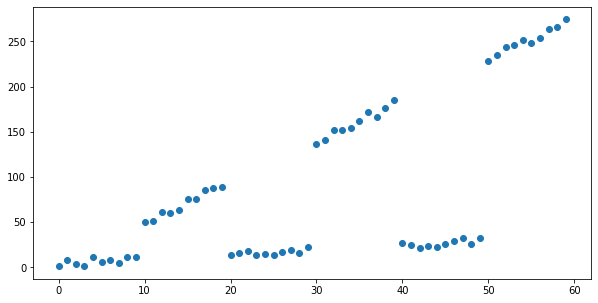

In [3]:
# Mock data
x = np.arange(0, 60)
y = list(map(lambda x: x / 2 + (x // 10) % 2 * 20 * x / 5 + np.random.random() * 10, x))
x = pd.DataFrame({'x': x})

# Plot mock data
plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.show()

### Boosting

Let’s take a look first at how a linear regression model would fit to this data.

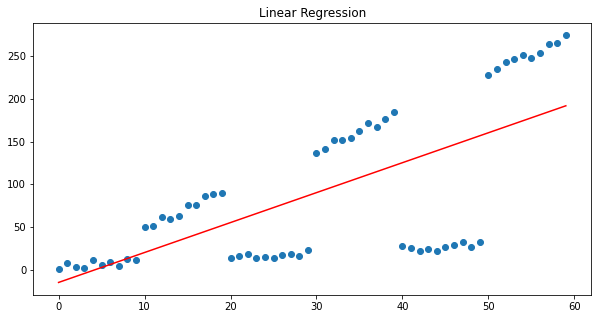

In [4]:
linear_regressor = linear_model.LinearRegression()

linear_regressor.fit(x, y)

plt.figure(figsize=(10, 5))
plt.title("Linear Regression")
plt.scatter(x, y)
plt.plot(x.squeeze(), linear_regressor.predict(x), color='r')
plt.show()

`Linear regression` models aim to minimise the squared error between the prediction and the actual output and it is clear from our pattern of residuals that the sum of the residual errors is approximately 0:

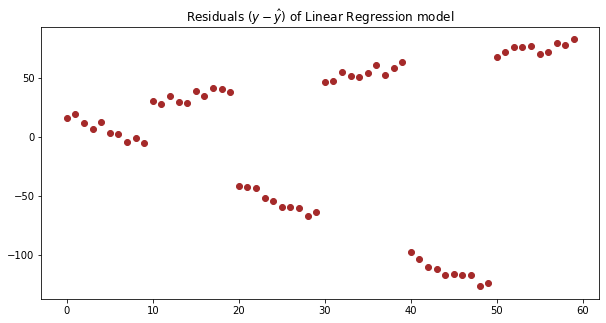

In [5]:
plt.figure(figsize=(10, 5))
plt.title("Residuals $(y - \hat{y})$ of Linear Regression model")
plt.scatter(x, y - linear_regressor.predict(x), color='brown')
plt.show()

It is also clear from this plot that there is a pattern in the residual errors, these are not random errors. We could fit model to the error terms from the output of the first model.

This is the idea behind boosting.

### Gradient Boosting

Gradient boosting uses a set of decision trees in series in an ensemble to predict y.

So let’s start with a Gradient Boosting regression model that has just 1 estimator and a tree with a depth of just 1:

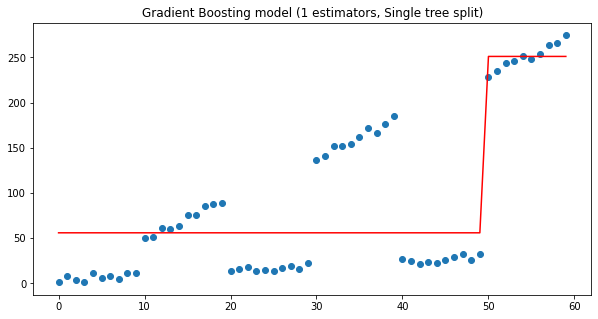

In [6]:
params = {
    'n_estimators': 1,
    'max_depth': 1,
    'learning_rate': 1,
    'criterion': 'mse'
}

gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)

gradient_boosting_regressor.fit(x, y)

plt.figure(figsize=(10, 5))
plt.title('Gradient Boosting model (1 estimators, Single tree split)')
plt.scatter(x, y)
plt.plot(x.squeeze(), gradient_boosting_regressor.predict(x), color='r')
plt.show()

We see that the depth 1 decision tree is split at x < 50 and x >= 50, where:

* If x < 50, y = 56
* If x >= 50, y = 250

This isn’t the best model, but Gradient Boosting models aren’t meant to have just 1 estimator and a single tree split. So where do we go from here, let’s look again at the residuals from this model:

So now we’ll plot the residuals from the predictions of this model:

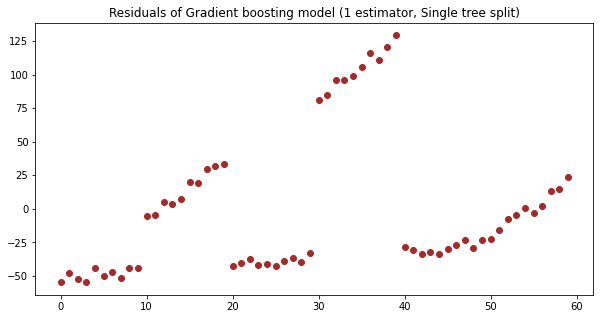

In [7]:
plt.figure(figsize=(10, 5))
plt.title('Residuals of Gradient boosting model (1 estimator, Single tree split)')
plt.scatter(x, y - gradient_boosting_regressor.predict(x), color='brown')
plt.show()

With one estimator, the residuals between 30-40 are very high. So what if we had 2 estimators and we fed the residuals from this first tree into the next tree, what would we expect?

Let’s give this a go:

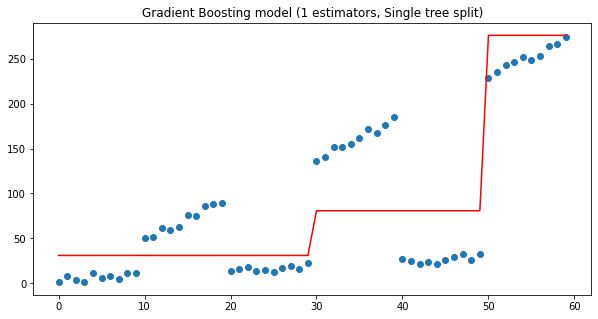

In [8]:
params['n_estimators'] = 2

gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)

gradient_boosting_regressor.fit(x, y)

plt.figure(figsize=(10, 5))
plt.title('Gradient Boosting model (1 estimators, Single tree split)')
plt.scatter(x, y)
plt.plot(x.squeeze(), gradient_boosting_regressor.predict(x), color='r')
plt.show()

Just as we expect, the single split for the second tree is made at 30 to move up to prediction from our first line and bring down the residual error for the area between 30-40.

If we continue to add estimators we get a closer and closer approximation of the distribution of y:

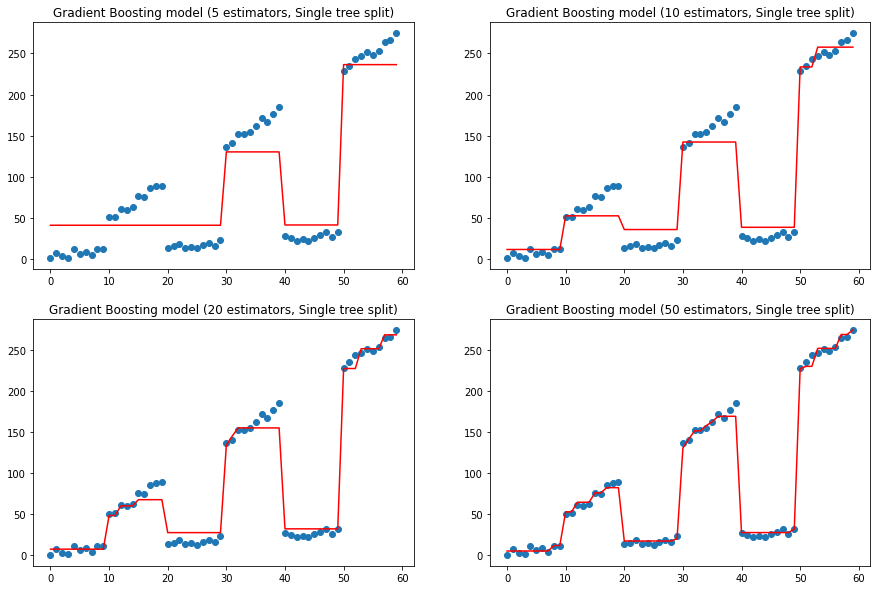

In [9]:
f, ax = plt.subplots(2, 2, figsize=(15, 10))

for idx, n_estimators in enumerate([5, 10, 20, 50]):
    params['n_estimators'] = n_estimators

    gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)

    gradient_boosting_regressor.fit(x, y)
    subplot = ax[idx // 2][idx % 2]
    subplot.set_title('Gradient Boosting model ({} estimators, Single tree split)'.format(n_estimators))
    subplot.scatter(x, y)
    subplot.plot(x.squeeze(), gradient_boosting_regressor.predict(x), color='r')
plt.show()

These models only consider a tree depth of 1 (single split).

Let’s also take a look at what happens if we increase the depth of the trees in our ensemble model, let’s take our 10 estimators gradient boosting and increase the tree depth:

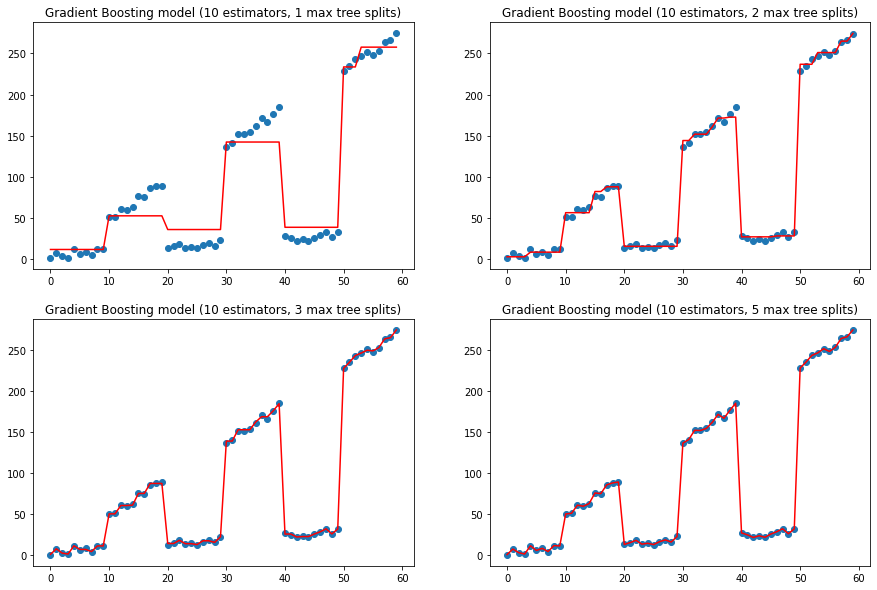

In [10]:
params['n_estimators'] = 10

f, ax = plt.subplots(2, 2, figsize=(15, 10))

for idx, max_depth in enumerate([1, 2, 3, 5]):
    params['max_depth'] = max_depth

    gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)

    gradient_boosting_regressor.fit(x, y)
    subplot = ax[idx // 2][idx % 2]
    subplot.set_title('Gradient Boosting model (10 estimators, {} max tree splits)'.format(max_depth))
    subplot.scatter(x, y)
    subplot.plot(x.squeeze(), gradient_boosting_regressor.predict(x), color='r')
plt.show()

We can see how increasing the both the estimators and the max depth, we get a better approximation of y but we can start to make the model somewhat prone to overfitting.

Therefore it is imperative to make sure we are using validation splits/cross-validation to make sure we are not overfitting our Gradient Boosting models.